In [98]:
%%writefile permutation.py

import numpy as np
import random
import math
import bisect
import matplotlib.pyplot as plt

def patience_sort(permlist):
    #This function creates a multi-dimensional array
    #containing all of the stacks
    #of the patience sorting algorithm
    #Input :
    # permlist : list of numbers to sort
    #Output :
    # len( stacks ) : returns the numbers of stacks
    #
    
    stacks = []
    len_stacks =[] #variable to keep track of number of stacks
    for x in permlist : #iterate through list of numbers
        temp_stack = [x]
        i = bisect.bisect_left(stacks, temp_stack)
        #determines where number should be inserted if
        # it was to be inserted in order
        if i != len(stacks) :
            # if number is not larger than all numbers on top
            #of stacks
            stacks[i].insert(0,x) #put number on appropriate stack
            len_stacks.append(len(stacks)) #update length variable
        else :
            stacks.append(temp_stack) #create new stack
            len_stacks.append(len(stacks)) #update length variable
        
    return len_stacks[-1]

        
def fisheryates(length) :
    #uses Fisher-Yates algorithm to create random permutation
    #Input :
    # length : desired length of permutation
    #Output :
    # L : random permutation
    
    L=[1] #begin with only 1 in the list
    for i in range(length-1):
        #iterate to create a list of length ’length’
        m=i+2 # initialize / update m
        k=random.randint(1,m) 
        #generate a random integer between 1 and m.
        if k==m:
            L.append(m) #append m to the end of the list
        else :
            L.insert(k-1,m) 
            #insert m in (k−1)st place in the list
    
    return L #return random permutation


def mallows(length,q) :
#uses the Mallows measure to create a permutation
#Input :
# length : desired length of permutation
# q : 1−probability of success 
#  so expectation of geometric is 1/(1-q) 
#   which gives the approx avg number of inversions-per-length
#Output :
# L : permutation

    L=[1] #begin with only 1 in the list

    for i in range(length-1):
    #iterate to create list of length 'length'
        m=i+2 # i n i t i a l i z e / u p d a te m
        x=np.random.geometric(p=1-q,size=1)
            #generate a geometric random integer, probability p
        xx=x[0] #get the number in the array bc Python3-change
        y=1+((xx-1)%m) #find y based on Mallows truncated geometric
        if y==1:
            L.append(m) #append m to end of the list
        else :
            L.insert(m+1-y,m)
                #insert m at the m+1−y position in the list
    return L


length_list=1000 #change this variable to change n
length_data=1000 #change this value to change
#number of times program should
#run to collect data

data =[] # initialize array to hold data
q=0.8 #change this value to change the Mallows q


#create data
for i in range(length_data) :
    data.append(patience_sort(mallows(length_list,q)))
    

#create histogram for given data
fig=plt.figure()
ax=fig.add_subplot(111)
n, bins, patches=ax.hist(data,10)
ax.grid(True)
plt.title('LLIS of a Mallows Permutation')
plt.xlabel('Length of the Longest Increasing Subsequence')
plt.ylabel('Number of occurences')
plt.show( )


Overwriting permutation.py


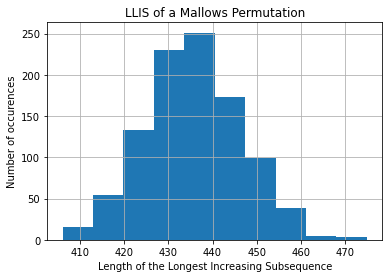

In [99]:
%run permutation.py